 # 📌ACTIVIDAD 3: CLASIFICADOR K-NN.
 ## PASO 1: CARGA DE DATOS Y CREACIÓN DEL MODELO.
 Crea el notebook saa_02_p04_a3_<tus_iniciales>.ipynb donde realizar esta actividad. Continuamos
usando el fichero wine.csv para implementar ahora un clasificador KNN multiclase y tras construirlo
volvemos a intentar mejorarlo eliminando características que no aporten demasiado, pero usando otro
enfoque, porque ahora no podemos aplicar restricciones de tipo L1.

a) Copia el fichero saa_u02_p04_a2_<tus_iniciales>.ipynb en el fichero
saa_u02_p04_a3_<tus_iniciales>.ipynb para cargar los datos de manera similar a como lo
hiciste antes y completa el resto de apartados. Cuando particiones los datos y realices otras
operaciones aleatorias vuelve a utilizar una semilla aleatoria que coincida con la longitud de tu
nombre concatenada a la de tu primer apellido y concatenada a la de tu segundo apellido.

 b) Continuamos usando un objeto multiclass.OneVsRestClassifier() para que utilice el
método uno contra el resto y ahora un modelo de clasificación de tipo
neighbors.NeighborsClassifier con el valor de k (parámetro n_neighbors) que prefieras.
Borra el código que imprime los parámetros de las líneas de los modelos de regresión porque k
vecinos cercanos no usa línea (borra el apartado c) anterior).

 c) Entrena el modelo y muestra los valores de la matriz de confusión y las métricas de eficiencia o
alternativamente un informe de clasificación donde aparezcan tanto para los datos de train
como para los datos de test.

 d)  Muestra la curva ROC y el valor AUC de cada clase y del modelo en global en los datos de
test. Para hacerlo ten en cuenta que ahora este modelo no implementa la función
decision_function() así que tendremos que utilizar predict_proba().

 e) Responde a la vista de los resultados de los apartados d) y e) ¿Generaliza bien o tiene
overfitting?<span style="color:green;">Overfitting</span>

 f) Borra el código del resto de apartados anteriores.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Cargar los datos (ajusta el nombre del fichero si es necesario)
df_vino = pd.read_csv('../recursos/U02_P04/wine.csv', header=None)
df_vino.columns = ['Class', 'Alcohol', 'Ácido Málico', 'Posos',
                   'Alcalinidad de posos', 'Magnesio', 'Total Fenoles',
                   'Flavonoides', 'No flavonoides fenoles', 'Proantocianinas',
                   'Intensidad Color', 'Saturación',
                   'OD280/OD315 de vinos diluidos', 'Prolina']

print('Clases', np.unique(df_vino['Class']))
print(df_vino.head())

# Dividir en train + test
x, y = df_vino.iloc[:, 1:].values, df_vino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Semilla aleatoria (longitudes del nombre y apellidos concatenadas)
random_seed = 657


# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo OneVsRest con KNeighborsClassifier (ajusta el valor de k según prefieras)
k = 5  # Puedes cambiar el valor de k según tus pruebas
knn = KNeighborsClassifier(n_neighbors=k)
ovo_knn = OneVsRestClassifier(knn)

# Entrenamiento del modelo
ovo_knn.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = ovo_knn.predict(X_train_scaled)
y_test_pred = ovo_knn.predict(X_test_scaled)

# Evaluación
print("Matriz de Confusión (Test):\n", confusion_matrix(y_test, y_test_pred))
print("\nReporte de Clasificación (Test):\n", classification_report(y_test, y_test_pred))


Clases [1 2 3]
   Class  Alcohol  Ácido Málico  Posos  Alcalinidad de posos  Magnesio  \
0      1    14.23          1.71   2.43                  15.6       127   
1      1    13.20          1.78   2.14                  11.2       100   
2      1    13.16          2.36   2.67                  18.6       101   
3      1    14.37          1.95   2.50                  16.8       113   
4      1    13.24          2.59   2.87                  21.0       118   

   Total Fenoles  Flavonoides  No flavonoides fenoles  Proantocianinas  \
0           2.80         3.06                    0.28             2.29   
1           2.65         2.76                    0.26             1.28   
2           2.80         3.24                    0.30             2.81   
3           3.85         3.49                    0.24             2.18   
4           2.80         2.69                    0.39             1.82   

   Intensidad Color  Saturación  OD280/OD315 de vinos diluidos  Prolina  
0              5.64  

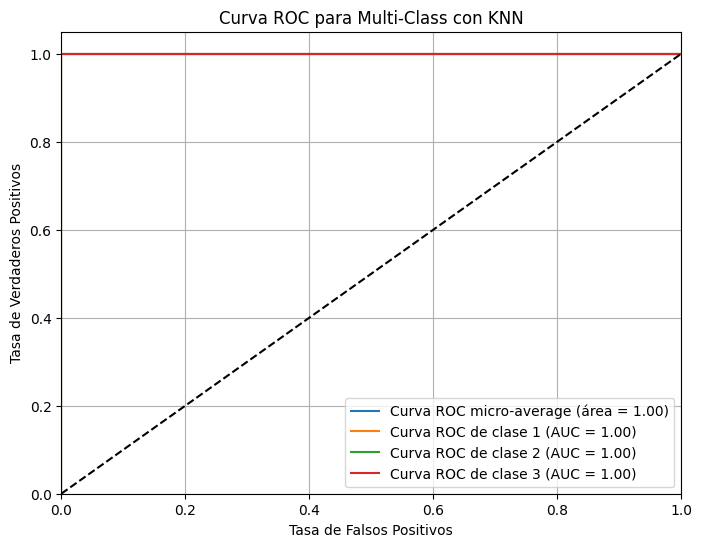

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas para ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_score = ovo_knn.predict_proba(X_test_scaled)  # Obtener probabilidades en vez de etiquetas

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_bin.shape[1]  # Número de clases

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calcular AUC

# Curva ROC micro-promediada
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label='Curva ROC micro-average (área = {0:0.2f})'.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de clase {0} (AUC = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Multi-Class con KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## PASO 2: MEJORA DEL MODELO CON SBS.
 La selección secuencial de características (SBS) es una familia de algoritmos de búsqueda de tipo
greedy1 (sistemáticos o ansiosos) que se utilizan para reducir la dimensionalidad d de un espacio de
datos a una dimensión k donde k < d. El objetivo es seleccionar las k características que sean más
relevantes para el problema de entre las que hay originalmente. Esta técnica puede ser muy útil sobre
todo para aquellos algoritmos que no soportan regularización.


 Uno de estos algoritmos es el Sequential Backward Selection (SBS), que introduce un poco de
sobrecarga para seleccionar estas características a cambio de mejorar mucho el rendimiento de su
entrenamiento y funcionamiento.


 La idea del algoritmo SBS es bastante simple: elimina características secuencialmente de los datos
actuales hasta alcanzar el número de características deseado. Para decidir la característica a eliminar
en cada etapa debemos usar una función criterio que llamamos J y que hay que minimizar.


El criterio calculado por la función J puede ser simplemente la diferencia de eficiencia del modelo
antes y después de eliminar la característica. Así que en cada paso eliminamos la característica que
menos pérdida de rendimiento genere. El algoritmo será:
 1. Inicializar k = d donde d es la dimensionalidad de todo el espacio de características de X.
 2. Encontrar la característica x− que maximiza el criterio x− = argmax J(Xk-x) donde x ϵ Xk

---

 1Algoritmos de tipo Greedy: hacen búsquedas escogiendo opciones localmente óptimas y en general consiguen
encontrar soluciones no siempre óptimas a los problemas en un tiempo razonable, en contraste con los algoritmos
exhaustivos que encuentran algunas de las soluciones óptimas de los problemas pero con un esfuerzo muchísimo
mayor.


 3. Eliminar la característica x− del conjunto de características: Xk-1 = Xk – x-; k= k-1
 4. Terminar si K es el número de características deseadas o sino volver al paso 2

 g)
 Aunque está implementado en
scikit-learn
 , como es sencillo de hacer lo vamos a progrmar
nosotros. Así que manos a la obra, crea el fichero
código:

In [25]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS_samartlop():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        """Calcula la precisión del modelo con un subconjunto de características."""
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        return self.scoring(y_test, y_pred)

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)  # Calcula el score inicial
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]
        return self


In [26]:
def transform(self, X):
    return X[:, self.indices_]

def _calc_score(self, x_train, y_train, x_test, y_test, indices):
    self.estimator.fit(x_train[:, indices], y_train)
    y_pred = self.estimator.predict(x_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score


Para utilizarlo, un ejemplo:


In [27]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS_samartlop(knn, k_features=1)
sbs.fit(X_train_scaled, y_train)

Aunque esta implementación de SBS ya divide internamente el dataset en train y test dentro de su
función fit(), externamente le proporcionamos como datos de trabajo el dataset X_train. Así es como
si internamente la clase SBS crease una división train + val + test para prevenir usar los datos de test
durante el entrenamiento o la búsqueda de parámetros, ya que SBS calcula scores de las mejores

 características y si usamos el dataset test original podemos crear overfitting a esos datos de test y
generar una medida de desempeño engañosa cuando usemos sus datos para comprobar si el modelo
generaliza bien.


 h)
 Como el objeto
sbs
 ha ido coleccionando los
scores
 de cada etapa, podemos graficar la
evolución a medida que va quitando características. Adapta el siguiente código y lo añades a
tu fichero (ten en cuenta que estás usando el objeto multiclase) y cuando lo ejecutes, a la vista
del gráfico, ¿En qué rango de características funciona bien el modelo [desde, hasta]? <span style="color:green;">Entre 2 y 12</span>

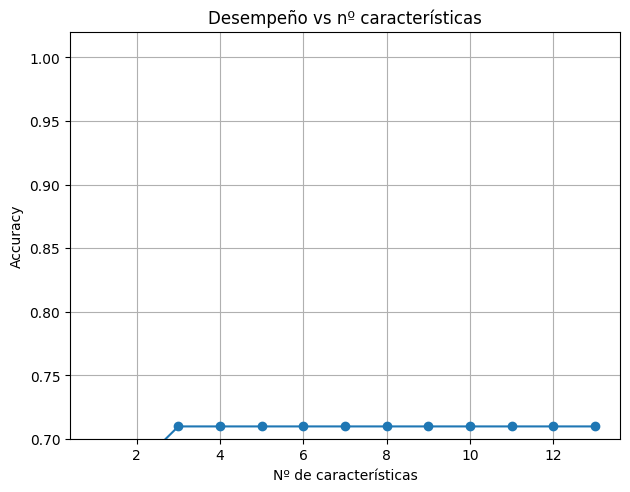

In [31]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS_samartlop(knn, k_features=1)
# Le pedimos que pruebe hasta dejas solo 1
sbs.fit(X_train, y_train)
# Dibujamos como cambia el desempeño al cambiar el nº de características
k_carac = [len(k) for k in sbs.subsets_]
plt.plot(k_carac, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Nº de características')
plt.grid()
plt.tight_layout()
plt.title("Desempeño vs nº características")
plt.show()

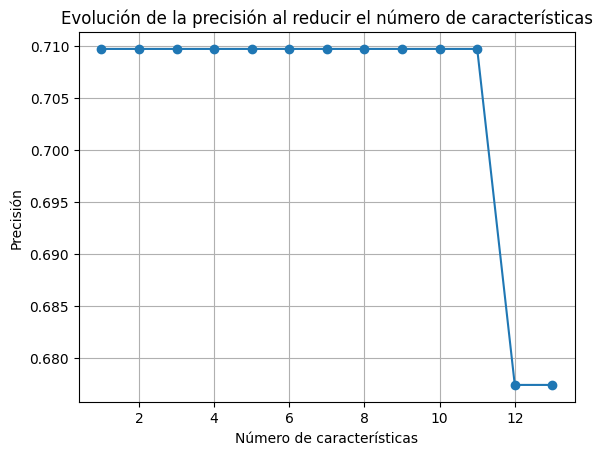

In [38]:
import matplotlib.pyplot as plt

# Supongamos que X_train_scaled y y_train son tus datos de entrenamiento
# Ya tienes el objeto sbs entrenado con sbs.fit(X_train_scaled, y_train)

# Extraemos los scores y el número de características en cada paso
scores = sbs.scores_
k_features = range(1, len(scores) + 1)

# Graficamos los scores
plt.plot(k_features, scores, marker='o')
plt.xlabel('Número de características')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión al reducir el número de características')
plt.grid(True)
plt.show()


i)
 Si al clasificador
KNN
 le afectan cosas, intenta minimizar estas cosas antes de realizar la
división en
train + test
 . Además, por prudencia (porque nos está dando una medida del
desempeño agrupado en las 3 clases) vamos a quedarnos con la cantidad de características
mayor que tenga un mejor desempeño, es decir, si entre [1, 4] tiene buen desempeño, nos
quedamos con 4 en vez de con 1 por si a alguna clase le afecta demasiado no tener alguna de
las que descartemos, pero esa pérdida se enmascara con buenos resultados en las otra clases.
Así que nos quedaríamos con 4. Pero es necesario saber qué características son esas. Si adaptas
este código en el que veríamos qué puedes saberlo suponiendo que hay 13 y queremos
quedarnos con 3

In [33]:
k3 = list(sbs.subsets_[10])
print(df_vino.columns[1:][k3])

Index(['Ácido Málico', 'Magnesio', 'Prolina'], dtype='object')


j)
 Ahora crea un nuevo clasificador pero descartando las categorías que el método anterior te
indique que son descartables. Puedes adaptar el ejemplo. Calcula matriz, e informe de
clasificación para
train
 y test (mira si generaliza) y la curva
dos modelos. ¿Hay diferencias significativas?

In [34]:
knn.fit(X_train[:, k3], y_train)


KNeighborsClassifier()

## PASO 3: MEJORA DEL MODELO CON ENSEMBLES.
 . Compara el desempeño de los
Otra aproximación para hacer el mismo trabajo de encontrar características que se puedan descartar es
usar random forest, un método ensemble que ya hemos comentado en esta unidad y que veremos con
más detalle en la siguiente unidad. Al usar random forest suponemos que la importancia media de las
características decrece cuando los cálculos se hacen a partir de todos los árboles del bosque.
 En scikit-learn la implementación de random forest que hay ya recopila información sobre la
importancia de cada característica cuando se construye el bosque y se almacena en la propiedad
feature_importances_ de un RandomForestClassifier.


k)
Adapta el siguiente código que utiliza un
random forest
de 500 árboles para averiguar la
importancia de cada característica y haz un listado de mayor a menor importancia. ¿Coincide
con alguno de los métodos anteriores que hemos usado?

In [36]:
from sklearn.ensemble import RandomForestClassifier
carac_labels = df_vino.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=123)
forest.fit(X_train, y_train)
importancias = forest.feature_importances_
indices = np.argsort(importancias)[::-1]

## PASO 4: BUSCAR EL MEJOR MODELO
 Entrena estos clasificadores a ver si consigues mejorar el accuracy y el overfitting. No uses GridSearch,
prefiero que uses manuealmente los modelos. Si quieres, si puedes usar validación cruzada.
• Regresión logística.

 • SoftMax.

 • Perceptrón.

 • Bagging

 • Boosting

 • Voting de 3 modelos

• Stacking de 3 modelos (los que quieras)

 #### ENTREGAR:
 e)
 Código de entrenamiento de modelos y captura de ejecución de test, matriz de confusión,
informe, curva ROC y AUC de cada uno. Guarda el mejor modelo a un fichero.